# 演習問題２
## ベイズの定理（事後確率）

## 乱数によるシミュレーションを実施してみる

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### B先生が問題を作ったとき、変数testを0、K先生が作ったとき、1とする
### さらにB先生の問題に統計がはいっているとき、変数statを0、K先生の問題に統計が入っているときを1とする
### 試行をN回繰り返したときの確率分布を確認する

### コーディング基本方針
- なるべくforループを露わに書かず、内包表記で済ませるようにする
- 乱数の発生はループ処理ではなく、配列と内包表記により実現する

In [2]:
# シミュレーション初期設定
n = 10000
P = 2/3
PSTAT = np.array([1/5,1/2])

# 要素数Nの一様分布に従う乱数の配列を返す
rand_test = np.random.rand(n)

# 後でインデックスに使うのでtestには整数値を格納する
test = [1 if i>2/3 else 0 for i in rand_test]
# 試しに合計を出すと、だいたい1/3になっており、K先生が問題を作ったときの値が1になっていることがわかる
print(np.sum(test))

# 配列testから変数statを内包表記で作成する
rand_stat = np.random.rand(n)
stat = [1 if p<PSTAT[test[i]] else 0 for i,p in enumerate(rand_stat)]
print(np.sum(stat))

# 問題に統計が入っている確率は
# (2/3)*(1/5) + (1/3)*(1/2) = 0.3
# なので、おおよそあっている

3267
2936


In [3]:
# 問題に統計が入っているとき、B先生が問題を作った確率を求める
# 配列statが1であるインデックスにおいて、配列statが0である確率を求めれば良い

# 配列statが1であるインデックスは
problem_stat = [test[idx] for idx,n in enumerate(stat) if n==1]
# ちゃんと統計が入っている問題数と同じ数だけ値が取れていることを確認
print(len(problem_stat))

# B先生が問題を作った場合のtestは値が0なので、配列の要素数から合計を除けば良い
p = (len(problem_stat) - np.sum(problem_stat)) / len(problem_stat)
print(p)

# 回答は4/9なのでおおよそあっている

2936
0.4478882833787466


## そもそもif文を使わずにステップ関数を使うやり方を試してみる（2020/03/06）
### ステップ関数には、pythonが指定条件のTrue/Falseを1/0で返すことを利用する
### やっている内容はほぼ変わらないし、コードの見た目もほとんど変わらない
### ただし、条件分岐を何らかの関数で代替する、という考え方にもっていけるのならば、その方がよりきれいなコーディングができるので良いと思われる

In [4]:
# シミュレーション初期設定
n = 10000                       # 発生させる乱数の数
P = 2/3                         # B先生が問題を作る確率　B先生が問題を作った場合、1となるようにする
PSTAT = np.array([1/5,1/2])     # B先生、K先生がそれぞれ統計の問題を入れる確率を配列にする、後でインデックスで指定できるようにするため

# 2つの乱数列を発生させる
rand_test = np.random.rand(n)  # テストをどちらの先生が作成するかを決める一様乱数
rand_stat = np.random.rand(n)  # 問題に統計が含まれるかどうかを決める一様乱数

# step関数を用いてrand_testからどちらの先生が問題を作成したかを決める
test = [1 * (x > P) for x in rand_test]                                 # (x>P)はTrueのとき1を、Falseのとき0を返すので、一様乱数に対して指定の閾値を設定すれば指定の確率でのベルヌーイ試行ができる
stat = [1 * (x < PSTAT[test[idx]]) for idx, x in enumerate(rand_stat)]  # enumerateでindexとvalueを取得、rand_statのインデックスに対応するtestの値を利用してどちらの先生の統計を入れる確率をとるかを決める

# 値の確認
print(np.sum(test))
print(np.sum(stat))

3309
2986


### コードの妥当性が確認できたので、ここからシミュレーションパート

In [5]:
# シミュレーション実施の関数を作成
def bayesSingle():
    np.random.seed()
    rand_test = np.random.rand(n)
    #test = [1 if i > P else 0 for i in rand_test]
    test = [1 * (x > P) for x in rand_test]
    rand_stat = np.random.rand(n)
    #stat = [1 if p < PSTAT[test[i]] else 0 for i,p in enumerate(rand_stat)]
    stat = [1 * (x < PSTAT[test[idx]]) for idx, x in enumerate(rand_stat)]
    problem_stat = [test[idx] for idx,n in enumerate(stat) if n==1]
    p = (len(problem_stat) - np.sum(problem_stat)) / len(problem_stat)
    return(p)

In [6]:
# シミュレーションを指定回数繰り返す
n = 10000                     # サンプルサイズ
N = 10000                     # シミュレーション回数
P = 2/3                       # B先生が問題を作る確率
PSTAT = np.array([1/5,1/2])   # B先生が統計を入れる確率、K先生が統計を入れる確率
p_result = np.zeros(N)        # 結果を格納する配列をゼロベクトルに初期化

# 配列のインデックスを指定して値を格納していくのもあり
for i in range(N):
    p_result[i] = bayesSingle()

In [7]:
# 平均と分散を出力、解答と比較
print("mean",np.mean(p_result))
print("variance",np.var(p_result))
print("answer",4/9)

mean 0.4444117417736077
variance 8.330079168698446e-05
answer 0.4444444444444444


C:\Users\yusuke_sato\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


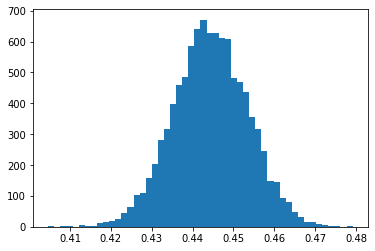

In [8]:
# 問題に統計が含まれているときにB先生が問題を作った確率分布をヒストグラムで表示
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(p_result, bins=50)
fig.show()

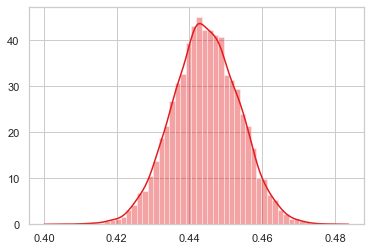

In [9]:
# seabornを使えばカーネル密度推定も簡単にできる
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set1')

sns.distplot(p_result, bins=50)